In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() #switch to seabord defaults

In [3]:
df = pd.read_csv("./datasets/multiTimeline.csv", skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,30,48
1,2004-02,75,26,48
2,2004-03,71,24,47
3,2004-04,70,22,47
4,2004-05,72,23,43


In [4]:
df.describe()

,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
count,169.000000,169.000000,169.000000
mean,49.668639,34.763314,47.159763
std,8.237344,8.227615,4.926052
min,35.000000,22.000000,39.000000
25%,44.000000,28.000000,44.000000
50%,49.000000,33.000000,46.000000
75%,53.000000,41.000000,50.000000
max,100.000000,59.000000,71.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
Month                   169 non-null object
diet: (Worldwide)       169 non-null int64
gym: (Worldwide)        169 non-null int64
finance: (Worldwide)    169 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [6]:
df.columns = ["month", "diet", "gym", "finance"] 
df.head()

,month,diet,gym,finance
0,2004-01,100,30,48
1,2004-02,75,26,48
2,2004-03,71,24,47
3,2004-04,70,22,47
4,2004-05,72,23,43


In [7]:
df.month = pd.to_datetime(df.month)
df.set_index("month", inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,30,48
2004-02-01,75,26,48
2004-03-01,71,24,47
2004-04-01,70,22,47
2004-05-01,72,23,43


Text(0.5,0,'Year')

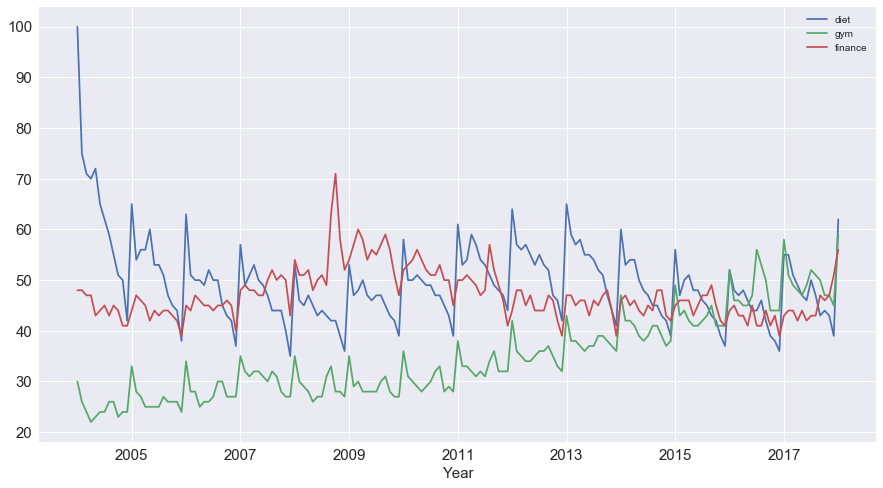

In [8]:
df.plot(figsize=(15,8), fontsize=15)
plt.xlabel("Year", fontsize=15)

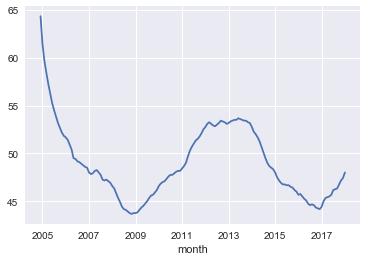

In [9]:
df["diet"].rolling(12).mean().plot() #avg the 12 pts over each month

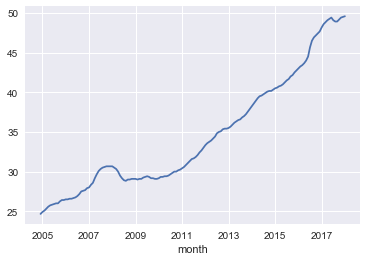

In [10]:
df["gym"].rolling(12).mean().plot()

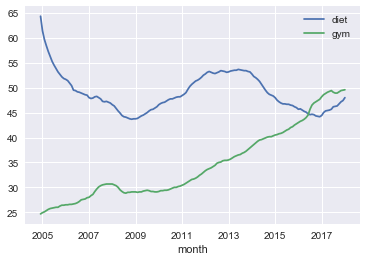

In [11]:
df.rolling(12).mean()[["diet", "gym"]].plot()

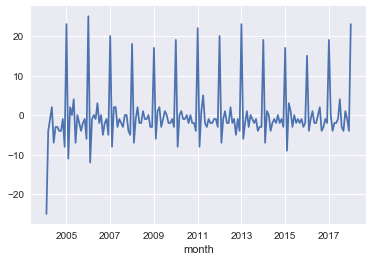

In [13]:
df["diet"].diff().plot() #differentiate to make the serie stationnary

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [31]:
# transform sklearn dataset in pd DataFrame:
df = pd.DataFrame(columns=iris.feature_names + ['target'], data=np.c_[iris.data, iris.target])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
